## Unsupervised learning for finding abnormall parts of brain on MRI images

### Load data

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown "https://drive.google.com/uc?export=download&id=1OlDwjTSYkRfaj72ru4jVbC3D0iYQs3qN"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?export=download&id=1OlDwjTSYkRfaj72ru4jVbC3D0iYQs3qN 



In [ ]:
nii_img  = nib.load('/content/text_gm_8.nii.gz')
nii_data = nii_img.get_fdata()

In [ ]:
print(nii_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 4 79 95 79 16  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.4:ddd0a010'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -70.0
srow_x          : [-2.  0.  0

In [ ]:
nii_data.shape

(79, 95, 79, 16)

### Plot some images

#### Side view

In [ ]:
import matplotlib.pyplot as plt
def show_slices(slices):
  """ Function to display row of image slices """
  fig, axes = plt.subplots(1, len(slices), figsize=(20, 4))
  for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Brain side pations')

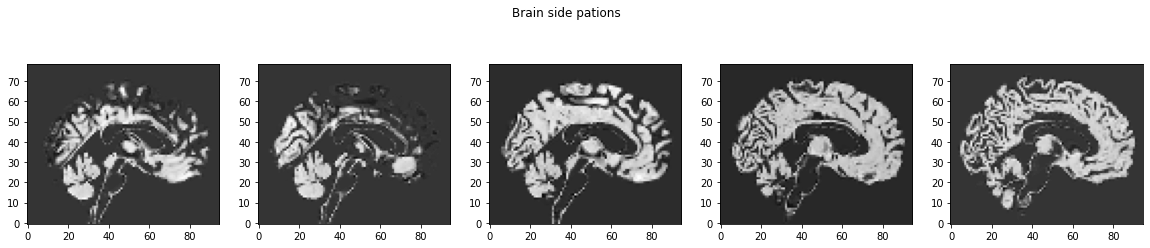

In [ ]:
slice_0 = nii_data[38, :, :, 8]
slice_1 = nii_data[39, :, :, 8]
slice_2 = nii_data[40, :, :, 8]
slice_3 = nii_data[41, :, :, 8]
slice_4 = nii_data[42, :, :, 8]
show_slices([slice_0, slice_1, slice_2, slice_3, slice_4])
plt.suptitle("Brain side pations")  

Text(0.5, 0.98, 'Brain side')

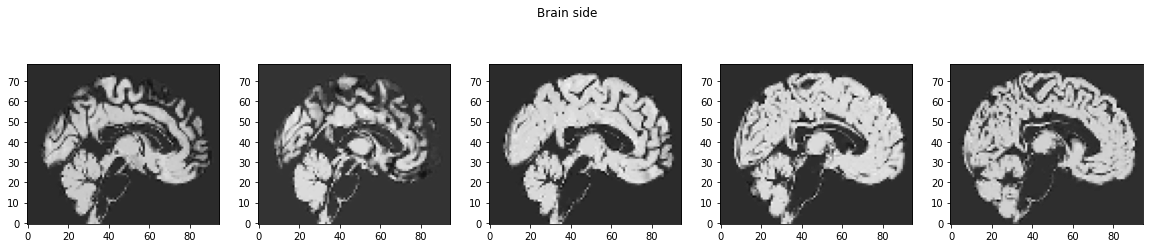

In [ ]:


slice_0 = nii_data[38, :, :, 0]
slice_1 = nii_data[39, :, :, 0]
slice_2 = nii_data[40, :, :, 0]
slice_3 = nii_data[41, :, :, 0]
slice_4 = nii_data[42, :, :, 0]
show_slices([slice_0, slice_1, slice_2, slice_3, slice_4])
plt.suptitle("Brain side")  

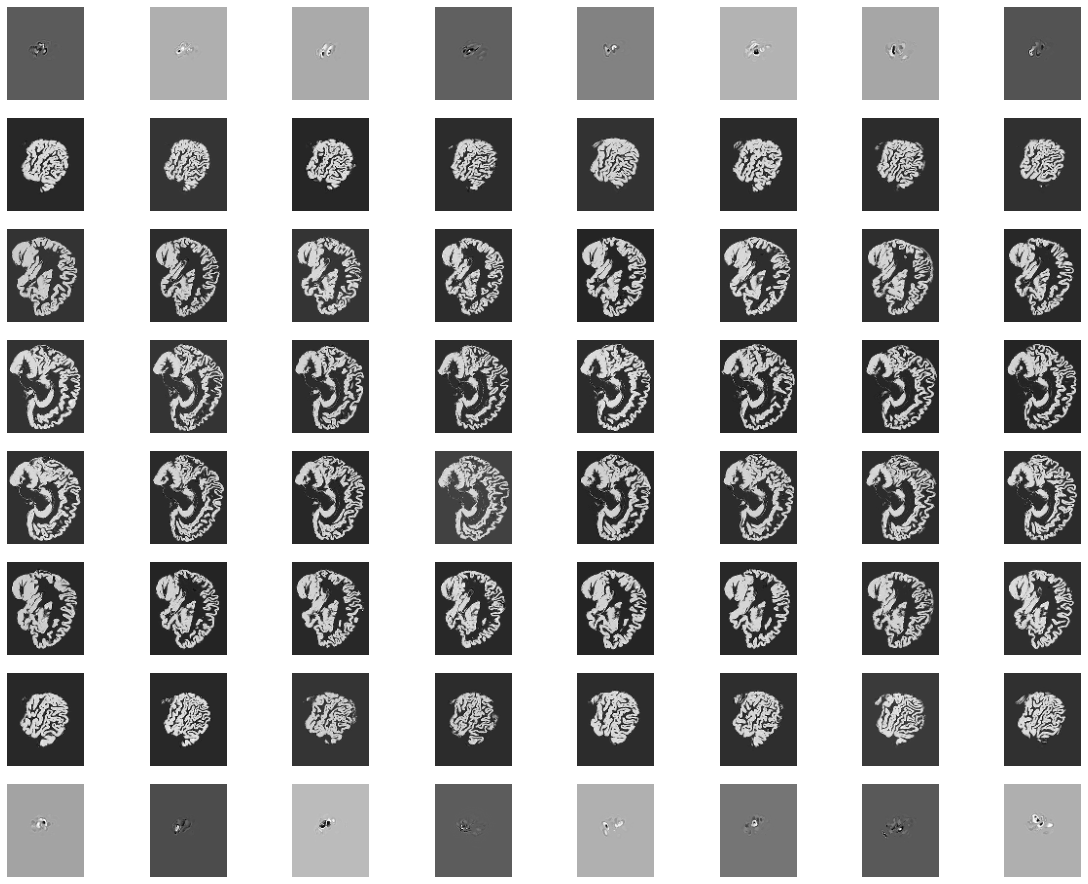

In [ ]:
fig, ax = plt.subplots(8, 8, figsize=(20, 16))

for i, slice in enumerate(np.linspace(0, 78, 8, dtype=int)):
    for frame in range(8):
        ax[i, frame].imshow(nii_data[slice, :, :, frame], cmap='gray', interpolation=None)
        ax[i, frame].axis('off')

plt.show() 

#### Front view

Text(0.5, 0.98, 'Brain front')

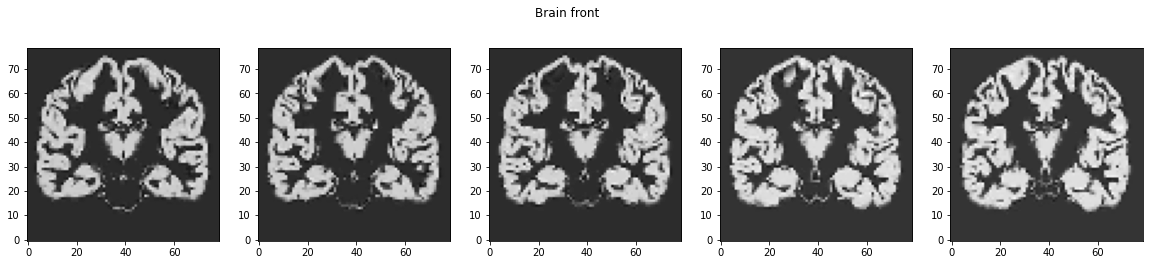

In [ ]:
import matplotlib.pyplot as plt
def show_slices(slices):
  """ Function to display row of image slices """
  fig, axes = plt.subplots(1, len(slices), figsize=(20, 4))
  for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = nii_data[:, 45, :, 0]
slice_1 = nii_data[:, 46, :, 0]
slice_2 = nii_data[:, 47, :, 0]
slice_3 = nii_data[:, 48, :, 0]
slice_4 = nii_data[:, 49, :, 0]
show_slices([slice_0, slice_1, slice_2, slice_3, slice_4])
plt.suptitle("Brain front")  

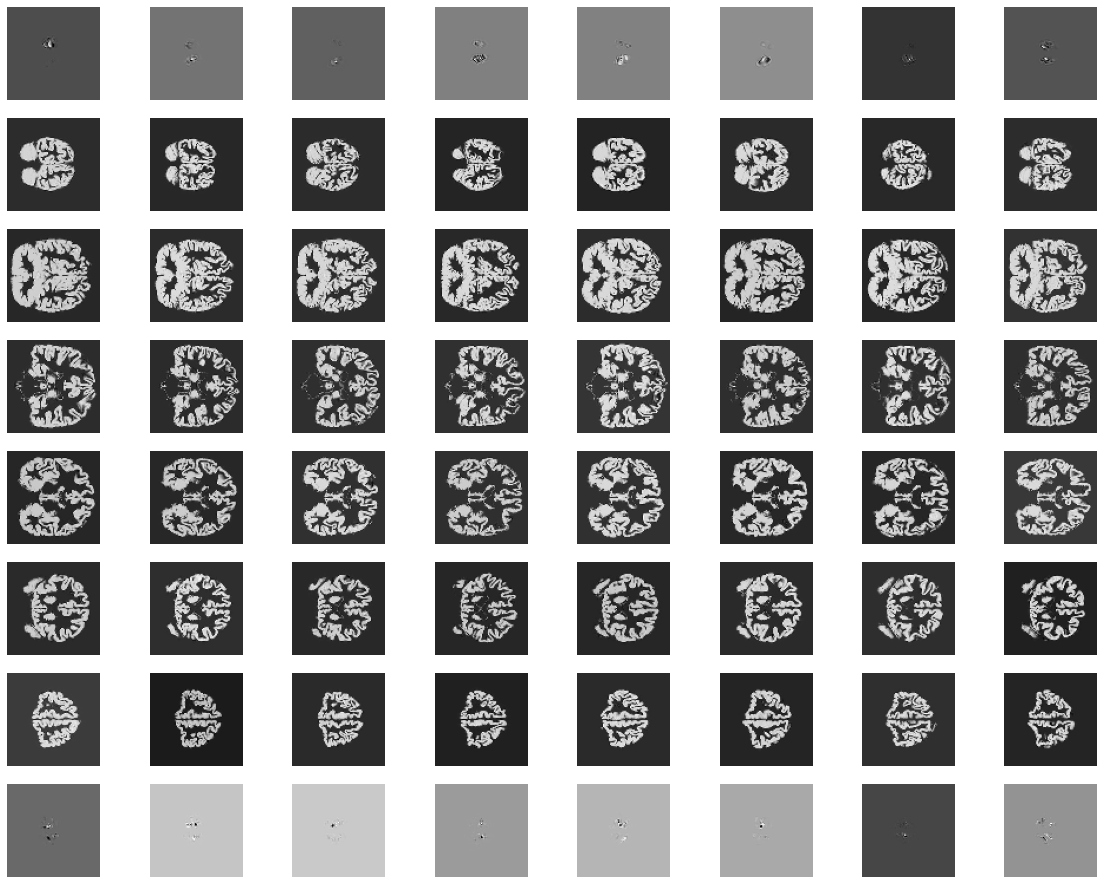

In [ ]:
fig, ax = plt.subplots(8, 8, figsize=(20, 16))

for i, slice in enumerate(np.linspace(0, 94, 8, dtype=int)):
    for frame in range(8):
        ax[i, frame].imshow(nii_data[:, slice, :, frame], cmap='gray', interpolation=None)
        ax[i, frame].axis('off')

plt.show() 

#### Top view

Text(0.5, 0.98, 'Brain top')

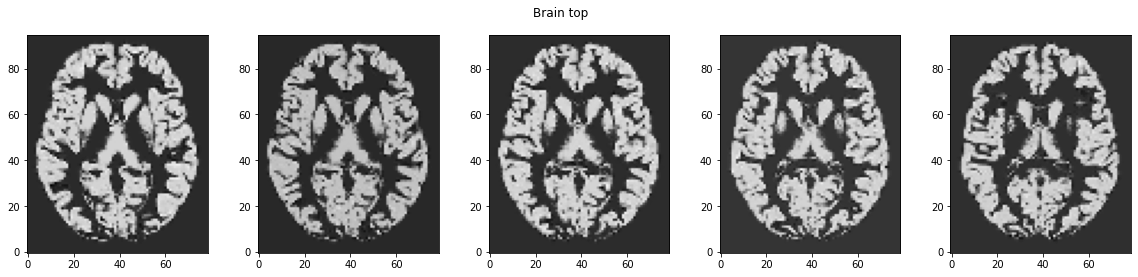

In [ ]:
def show_slices(slices):
  """ Function to display row of image slices """
  fig, axes = plt.subplots(1, len(slices), figsize=(20, 4))
  for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = nii_data[:, :, 38, 0]
slice_1 = nii_data[:, :, 39, 0]
slice_2 = nii_data[:, :, 40, 0]
slice_3 = nii_data[:, :, 41, 0]
slice_4 = nii_data[:, :, 42, 0]
show_slices([slice_0, slice_1, slice_2, slice_3, slice_4])
plt.suptitle("Brain top")  

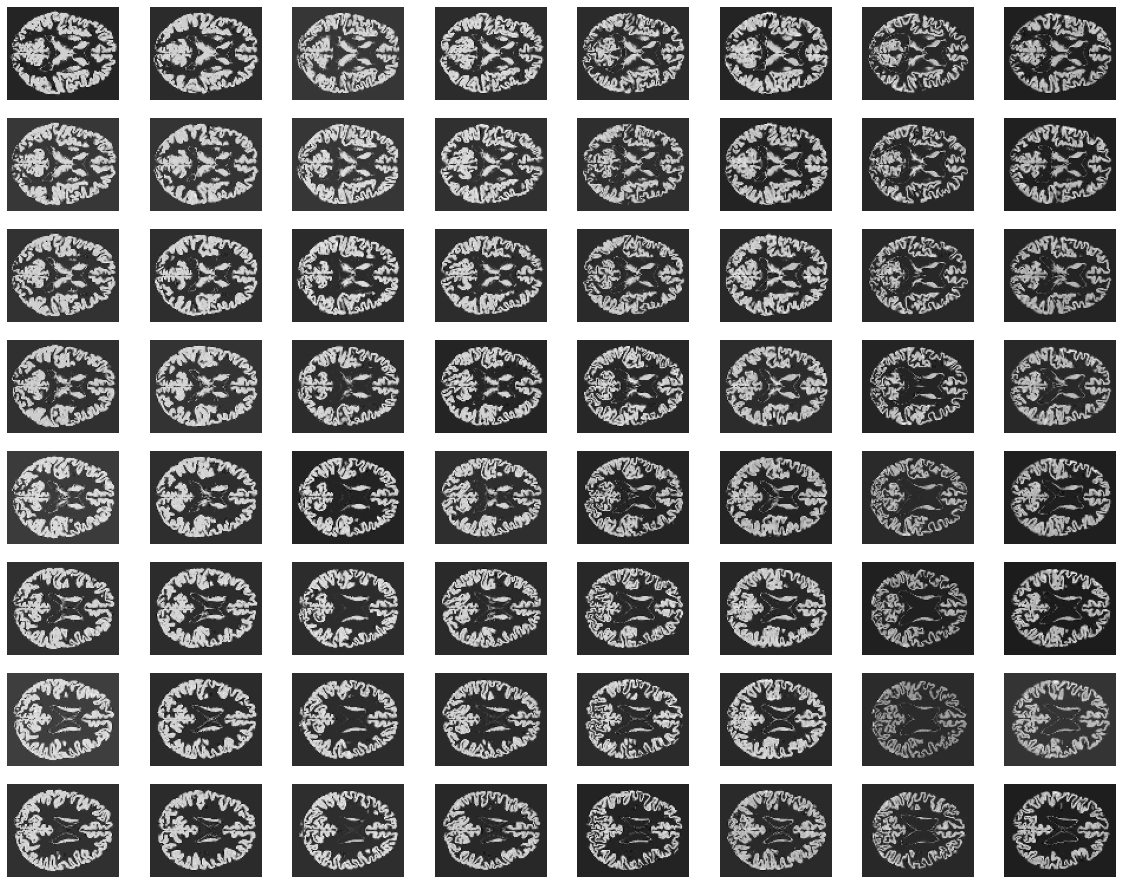

In [ ]:
fig, ax = plt.subplots(8, 8, figsize=(20, 16))

for slice in range(8):
    for frame in range(8):
        ax[slice, frame].imshow(nii_data[:, :, slice + 40, frame + 4], cmap='gray', interpolation=None)
        ax[slice, frame].axis('off')

plt.show() 

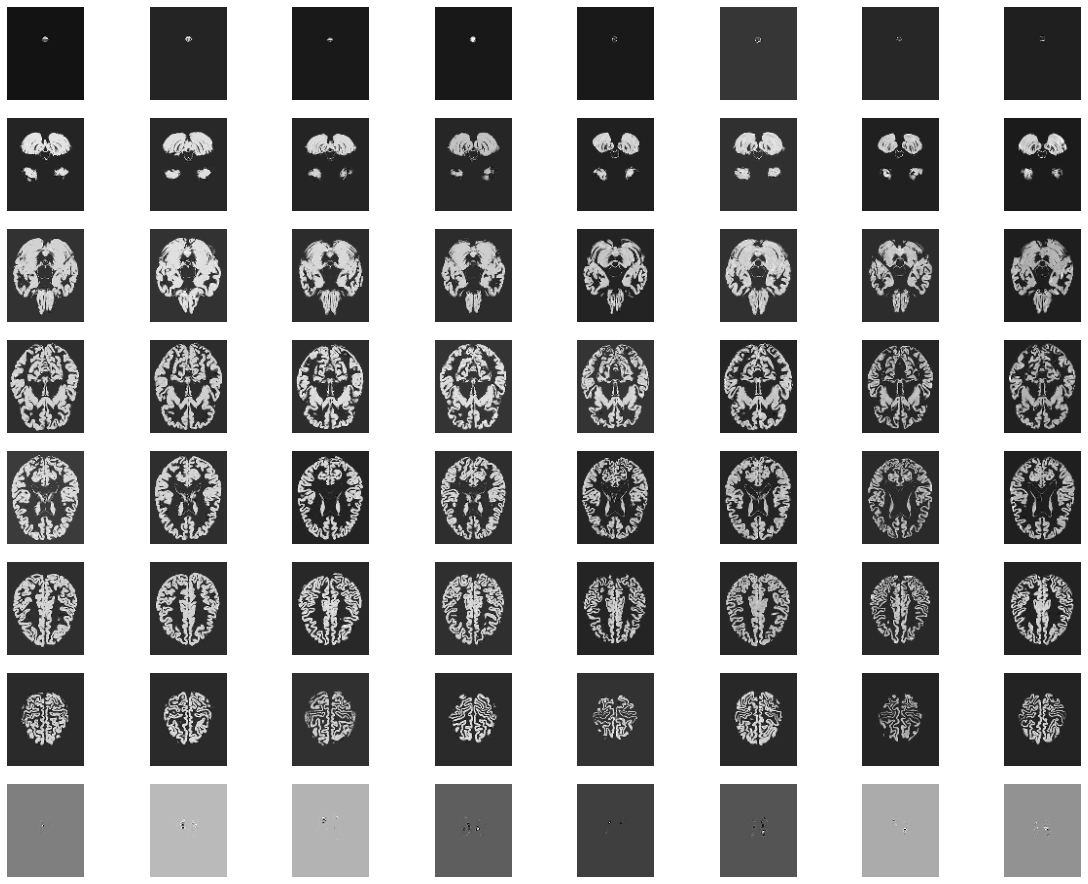

In [ ]:
fig, ax = plt.subplots(8, 8, figsize=(20, 16))

for i, slice in enumerate(np.linspace(0, 78, 8, dtype=int)):
    for frame in range(4,12):
        t_im = nii_data[:, :, slice, frame].T.copy()
        min_n = sorted(np.nan_to_num(np.unique(t_im)))[0]
        t_im = np.nan_to_num(t_im, min_n)
        t_im = t_im - np.min(t_im)
        t_im = t_im*(255/np.max(t_im))
        ax[i, frame-4].imshow(t_im, cmap='gray', interpolation=None)
        ax[i, frame-4].axis('off')

plt.show() 

#### First slices

Text(0.5, 0.98, 'First slices')

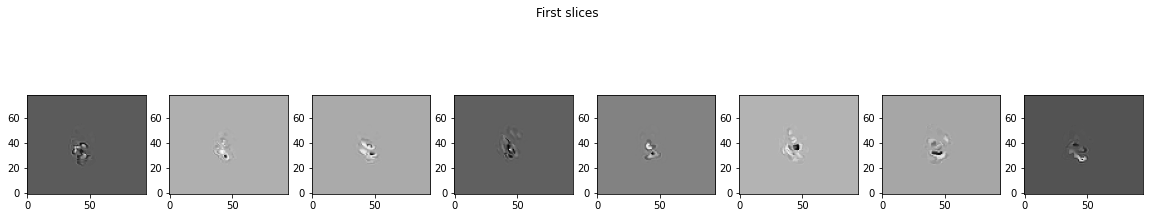

In [ ]:
show_slices([nii_data[0, :, :, i] for i in range(8)])
plt.suptitle("First slices")  

#### Plot dynamic MRI scans of single patient

In [ ]:
import numpy as np
import matplotlib.animation as animation
%matplotlib inline

In [ ]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

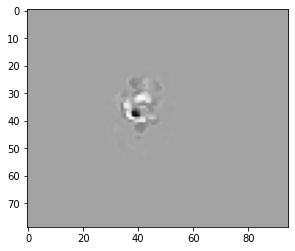

In [ ]:
fig, ax = plt.subplots()
ims = []
for i in range(79):
    im = ax.imshow(nii_data[i, :, :, 0].T, animated=True, cmap='gray', interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

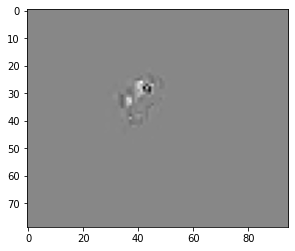

In [ ]:
fig, ax = plt.subplots()
ims = []
for i in range(79):
    im = ax.imshow(nii_data[i, :, :, -1].T, animated=True, cmap='gray', interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

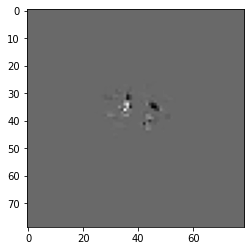

In [ ]:
fig, ax = plt.subplots()
ims = []
for i in range(95):
    im = ax.imshow(nii_data[:, i, :, 0].T, animated=True, cmap='gray', interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

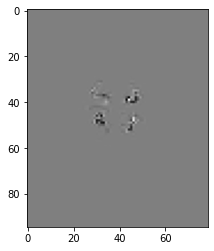

In [ ]:


fig, ax = plt.subplots()
ims = []
for i in range(79):
    im = ax.imshow(nii_data[:, :, i, 0].T, animated=True, cmap='gray', interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

### Load ind_knn_ad repository for training anomaly detector

In [ ]:
!git clone https://github.com/rvorias/ind_knn_ad.git

Cloning into 'ind_knn_ad'...
remote: Enumerating objects: 404, done.
remote: Counting objects: 100% (404/404), done.
remote: Compressing objects: 100% (317/317), done.
remote: Total 404 (delta 134), reused 338 (delta 82), pack-reused 0
Receiving objects: 100% (404/404), 10.46 MiB | 24.57 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [ ]:
!pip install timm

     |████████████████████████████████| 431 kB 8.4 MB/s 


In [ ]:
%cd ind_knn_ad/

/content/ind_knn_ad


In [ ]:
import os
import cv2
import torch

In [ ]:
from torchvision import transforms

### Training

In [ ]:
from indad.models import SPADE

In [ ]:
model = SPADE(k=5, backbone_name="resnet50")

In [ ]:
transform=transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize(72, interpolation=transforms.InterpolationMode.BICUBIC),
                transforms.CenterCrop(70),
                transforms.ToTensor(),
                #transforms.Normalize([.485, .456, .406], [.229, .224, .225]),
            ])

In [ ]:
d_l = []
for  i in os.listdir('/content/ind_knn_ad/datasets/transistor_reduced/train/good'):
  im = cv2.imread('/content/ind_knn_ad/datasets/transistor_reduced/train/good/' + i)
  #im_torch = torch.Tensor(cv2.resize(im, (224, 224))).permute(2, 0, 1).unsqueeze(0)
  d_l.append((transform(im).unsqueeze(0), ''))

In [ ]:
model.fit(d_l)

   100%|██████████| 50/50 [00:05<00:00,  9.31it/s]


### Inference

In [ ]:
im_test = cv2.imread('/content/ind_knn_ad/datasets/transistor_reduced/test/cut_lead/001.png')
im_torch_test = torch.Tensor(cv2.resize(im, (224, 224))).permute(2, 0, 1).unsqueeze(0)

In [ ]:
# get predictions
img_lvl_anom_score, pxl_lvl_anom_score = model.predict(transform(im_test).unsqueeze(0))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [ ]:
img_lvl_anom_score

tensor(9.8738)

In [ ]:
torch.max(pxl_lvl_anom_score),torch.min(pxl_lvl_anom_score)

(tensor(10.9604), tensor(2.2625))

In [ ]:
def tensor_to_img(x, normalize=False):
    if normalize:
        x *= [.485, .456, .406].unsqueeze(-1).unsqueeze(-1)
        x += [.229, .224, .225].unsqueeze(-1).unsqueeze(-1)
    x =  x.clip(0.,1.).permute(1,2,0).detach().numpy()
    return x

def pred_to_img(x, range):
    range_min, range_max = range
    x -= range_min
    if (range_max - range_min) > 0:
        x /= (range_max - range_min)
    return tensor_to_img(x)

In [ ]:
pred = pred_to_img(pxl_lvl_anom_score, (torch.min(pxl_lvl_anom_score), torch.max(pxl_lvl_anom_score)))

In [ ]:
pred.shape, np.min(pred), np.max(pred)

((224, 224, 1), 0.0, 1.0)

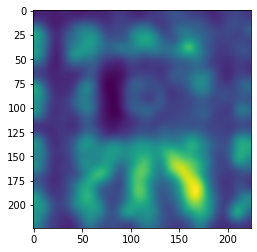

In [ ]:
plt.imshow(pred[:,:,0]*255)

### Second training
use only top view


In [ ]:
d_l_ = []
"""
for patient in range(8):
  for frame in range(79):
    t_im = nii_data[frame, :, :, patient].copy()
    min_n = sorted(np.nan_to_num(np.unique(t_im)))[0]
    t_im = np.nan_to_num(t_im, min_n)
    t_im = t_im - np.min(t_im)
    t_im = t_im*(255/np.max(t_im))
    t_im = np.expand_dims(t_im, 2)
    d_l_.append((transform(t_im.astype(np.uint8)).unsqueeze(0), 'side ' + str(frame)))
for patient in range(8):
  for frame in range(95):
    t_im = nii_data[:, frame, :, patient].copy()
    t_im = t_im - np.min(t_im)
    t_im = t_im*(255/np.max(t_im))
    t_im = np.expand_dims(t_im, 2)
    d_l_.append((transform(t_im.astype(np.uint8)).unsqueeze(0), 'front ' + str(frame)))"""
for patient in range(8):
  for frame in range(79):
    t_im = nii_data[:, :, frame, patient].copy()
    min_n = sorted(np.nan_to_num(np.unique(t_im)))[0]
    t_im = np.nan_to_num(t_im, min_n)
    t_im = t_im - np.min(t_im)
    t_im = t_im*(255/np.max(t_im))
    t_im = np.expand_dims(t_im, 2)
    d_l_.append((transform(t_im.astype(np.uint8)).unsqueeze(0), 'top ' + str(frame)))

In [ ]:
model = SPADE(k=5, backbone_name="resnet18")

In [ ]:
model.fit(d_l_)

   100%|██████████| 632/632 [00:35<00:00, 17.74it/s]


### Inference

In [ ]:
img_lvl_anom_score, pxl_lvl_anom_score = model.predict((transform(t_im.astype(np.uint8)).unsqueeze(0)))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [ ]:
pxl_lvl_anom_score.shape

torch.Size([1, 70, 70])

In [ ]:
pred = pred_to_img(pxl_lvl_anom_score, (torch.min(pxl_lvl_anom_score), torch.max(pxl_lvl_anom_score)))

In [ ]:
pred.squeeze().shape

(70, 70)

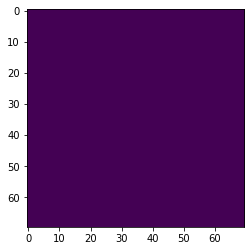

In [ ]:
plt.imshow(pred[:,:,0]*255)

In [ ]:
d_l_test = np.zeros_like(nii_data, dtype=float)
for patient in [0,7]:
  for frame in range(79):
    t_im = nii_data[:, :, frame, 8+patient].copy()
    min_n = sorted(np.nan_to_num(np.unique(t_im)))[0]
    t_im = np.nan_to_num(t_im, min_n)
    t_im = t_im - np.min(t_im)
    t_im = t_im*(255/np.max(t_im))
    t_im = np.expand_dims(t_im, 2)
    img_lvl_anom_score, pxl_lvl_anom_score = model.predict((transform(t_im.astype(np.uint8)).unsqueeze(0)))
    pred = pred_to_img(pxl_lvl_anom_score, (torch.min(pxl_lvl_anom_score), torch.max(pxl_lvl_anom_score)))
    d_l_test[:, :, frame, 8+patient] = cv2.resize(pred.squeeze(), (95,79))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


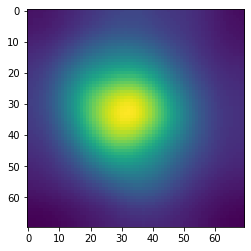

In [ ]:
plt.imshow(pred[:,:,0])

In [ ]:
np.unique(test_mask)

array([  0, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       254], dtype=uint8)

In [ ]:
to_plot = []
for i in range(4):
  t_im = nii_data[:, :, i*20, -1].T.copy()
  min_n = sorted(np.nan_to_num(np.unique(t_im)))[0]
  t_im = np.nan_to_num(t_im, min_n)
  t_im = t_im - np.min(t_im)
  t_im = (t_im*(255/np.max(t_im))).astype(np.uint8)
  t_im = cv2.merge([t_im, t_im, t_im])

  test_mask = d_l_test[:, :, i*20, -1].T.copy()
  test_mask[test_mask<0.98] = 0
  test_mask = (test_mask*255).astype(np.uint8)
  test_mask = cv2.merge([np.zeros_like(test_mask, dtype=np.uint8), np.zeros_like(test_mask, dtype=np.uint8), test_mask])

  dst = cv2.addWeighted(test_mask, 0.5, t_im, 1, 0.0)
  to_plot.append(dst)

#plt.imshow(dst[:,:,::-1])

### Plot prediction
Simple images and dynamic slices

Text(0.5, 0.98, 'Predictions')

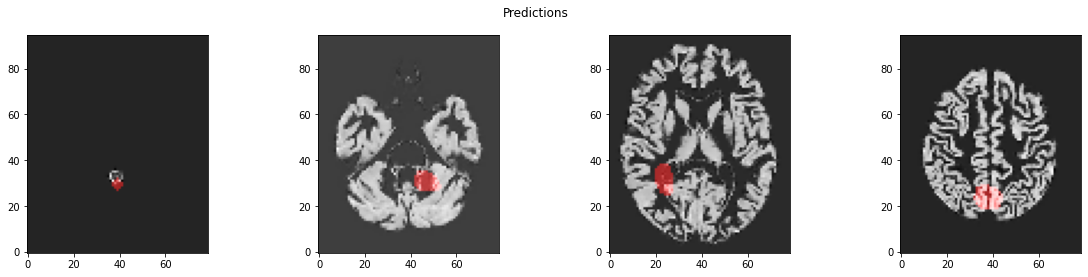

In [ ]:
fig, axes = plt.subplots(1, len(to_plot), figsize=(20, 4))
for i, slice in enumerate(to_plot):
  axes[i].imshow(slice[:,:,::-1], cmap="gray", origin="lower")
plt.suptitle("Predictions")  

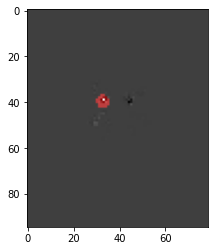

In [ ]:
fig, ax = plt.subplots()
ims = []
for i in range(79):
    t_im = nii_data[:, :, i, 8].T.copy()
    min_n = sorted(np.nan_to_num(np.unique(t_im)))[0]
    t_im = np.nan_to_num(t_im, min_n)
    t_im = t_im - np.min(t_im)
    t_im = (t_im*(255/np.max(t_im))).astype(np.uint8)
    t_im = cv2.merge([t_im, t_im, t_im])
    
    test_mask = d_l_test[:, :, i, 8].T.copy()
    test_mask[test_mask<0.98] = 0
    test_mask = (test_mask*255).astype(np.uint8)
    test_mask = cv2.merge([np.zeros_like(test_mask), np.zeros_like(test_mask), test_mask])
    
    dst = cv2.addWeighted(test_mask, 0.5, t_im, 1, 0.0)
    
    im = ax.imshow(dst[:,:,::-1], cmap='gray', animated=True, interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

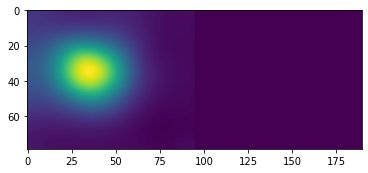

In [ ]:
fig, ax = plt.subplots()
ims = []
for i in range(79):
    im = ax.imshow(np.hstack([d_l_test[i, :, :, 11].T, nii_data[i, :, :, 11].T]), animated=True, interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

#### Ignore predictions with propabilye less than 0.95

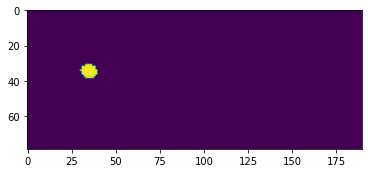

In [ ]:
fig, ax = plt.subplots()
ims = []
for i in range(79):
    test_im = d_l_test[i, :, :, 11].copy().T
    test_im[test_im<0.95] = 0
    im = ax.imshow(np.hstack([test_im, nii_data[i, :, :, 11].T]), animated=True, interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

### Try another models in lybrary

In [ ]:
from indad.models import PaDiM, PatchCore

In [ ]:
model_padim = PaDiM( d_reduced=250, backbone_name="resnet18")
model_patchcore = PatchCore( f_coreset= 0.1, backbone_name="resnet18")

In [ ]:
model_padim.fit(d_l_)
model_patchcore.fit(d_l_)

   100%|██████████| 2024/2024 [00:30<00:00, 66.28it/s]
   PaDiM: (randomly) reducing 448 dimensions to 250.
   100%|██████████| 2024/2024 [00:31<00:00, 64.85it/s]
   Fitting random projections. Start dim = torch.Size([163944, 384]).
   DONE.                 Transformed dim = torch.Size([163944, 296]).
     0%|          | 24/16393 [00:44<8:30:48,  1.87s/it]


KeyboardInterrupt: ignored

In [ ]:
d_l_test_padim = np.zeros_like(nii_data, dtype=float)
d_l_test_patchcore = np.zeros_like(nii_data, dtype=float)
for patient in [3]:
  for frame in range(79):
    t_im = nii_data[frame, :, :, 8+patient].copy()
    t_im = t_im - np.min(t_im)
    t_im = t_im*(255/np.max(t_im))
    t_im = np.expand_dims(t_im, 2)
    img_lvl_anom_score, pxl_lvl_anom_score = model_padim.predict((transform(t_im.astype(np.uint8)).unsqueeze(0)))
    pred = pred_to_img(pxl_lvl_anom_score, (torch.min(pxl_lvl_anom_score), torch.max(pxl_lvl_anom_score)))
    d_l_test_padim[frame, :, :, 8+patient] = cv2.resize(pred, (79,95))
    
    #img_lvl_anom_score, pxl_lvl_anom_score = model_patchcore.predict((transform(t_im.astype(np.uint8)).unsqueeze(0)))
    #pred = pred_to_img(pxl_lvl_anom_score, (torch.min(pxl_lvl_anom_score), torch.max(pxl_lvl_anom_score)))
    #d_l_test_patchcore[frame, :, :, 8+patient] = cv2.resize(pred, (79,95))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [ ]:
np.max(d_l_test_padim[i, :, :, 11].copy().T), np.min(d_l_test_padim[i, :, :, 11].copy().T)

(0.9954036474227905, 0.00032935646595433354)

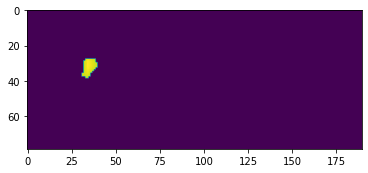

In [ ]:
fig, ax = plt.subplots()
ims = []
for i in range(79):
    test_im = d_l_test_padim[i, :, :, 11].copy().T
    test_im[test_im<0.90] = 0
    im = ax.imshow(np.hstack([test_im, nii_data[i, :, :, 11].T]), animated=True, interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

In [ ]:
fig, ax = plt.subplots()
ims = []
for i in range(79):
    im = ax.imshow(np.hstack([d_l_test_patchcore[i, :, :, 10].T, nii_data[i, :, :, 10].T]), animated=True, interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

### Load anomaly_localization_vae_gcams repository for another approach 

In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/cvblab/anomaly_localization_vae_gcams.git

Cloning into 'anomaly_localization_vae_gcams'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 125 (delta 50), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (125/125), 552.58 KiB | 6.82 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
!pip install kornia

     |████████████████████████████████| 474 kB 30.0 MB/s 


In [ ]:
%cd anomaly_localization_vae_gcams/code

/content/anomaly_localization_vae_gcams/code


In [ ]:
from torchvision import transforms

In [ ]:
from trainers import WSALTrainer

In [ ]:
import random
import torch

### Define necessary classes

In [ ]:
class DataGenerator(object):
    def __init__(self, nib_datasets, input_shape=(1, 70, 70)):

        'Internal states initialization'
        self.nib_datasets = nib_datasets
        self.input_shape = input_shape

        
        self.image_num = self.nib_datasets.shape[3] * (self.nib_datasets.shape[0] + self.nib_datasets.shape[1] + self.nib_datasets.shape[2]) 
        # Pre-allocate images
        self.X = np.zeros((self.image_num, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float32)

        # Load, and normalize images
        transform=transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize(input_shape[1:], interpolation=transforms.InterpolationMode.BICUBIC),
                transforms.CenterCrop(input_shape[1:]),
                transforms.ToTensor(),
                #transforms.Normalize([.485, .456, .406], [.229, .224, .225]),
            ])
        self.indexes = np.arange(0, self.image_num)
        
        print('[INFO]: Loading images...')
        ii = 0
        for patient in range(self.nib_datasets.shape[3]//2, self.nib_datasets.shape[3]):
          """for frame in range(self.nib_datasets.shape[0]):
            t_im = self.nib_datasets[frame, :, :, patient].copy()
            min_n = sorted(np.nan_to_num(np.unique(t_im)))[0]
            t_im = np.nan_to_num(t_im, min_n)
            t_im = t_im - np.min(t_im)
            t_im = t_im*(255/np.max(t_im))
            t_im = np.expand_dims(t_im, 2)
            self.X[ii] = transform(t_im.astype(np.uint8))
            ii+=1
          for frame in range(self.nib_datasets.shape[1]):
            t_im = nii_data[:, frame, :, patient].copy()
            t_im = t_im - np.min(t_im)
            t_im = t_im*(255/np.max(t_im))
            t_im = np.expand_dims(t_im, 2)
            self.X[ii] = transform(t_im.astype(np.uint8))
            ii+=1"""
          for frame in range(self.nib_datasets.shape[2]):
            t_im = nii_data[:, :, frame, patient].copy()
            min_n = sorted(np.nan_to_num(np.unique(t_im)))[0]
            t_im = np.nan_to_num(t_im, min_n)
            t_im = t_im - np.min(t_im)
            t_im = t_im*(255/np.max(t_im))
            t_im = np.expand_dims(t_im, 2)
            self.X[ii] = transform(t_im.astype(np.uint8))
            ii+=1

        print('[INFO]: Images loaded')

    def __len__(self):
        'Denotes the total number of samples'
        return self.image_num

    def __getitem__(self, index):
        'Generates one sample of data'

        x = self.X[index, :, :, :]

        return x, None

In [ ]:
class WSALDataGenerator(object):

    def __init__(self, dataset, batch_size=16, shuffle=False):

        'Internal states initialization'
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = self.dataset.indexes.copy()

        self._idx = 0
        self._reset()

    def __len__(self):

        N = len(self.indexes)
        b = self.batch_size
        return N // b

    def __iter__(self):

        return self

    def __next__(self):

        # If dataset is completed, stop iterator
        if self._idx + self.batch_size >= len(self.indexes):
            self._reset()
            raise StopIteration()

        
        # Load images and include into the batch
        X, Y = [], []
        for i in range(self._idx, self._idx + self.batch_size):
            x, y = self.dataset.__getitem__(self.indexes[i])
            X.append(x)
            Y.append(y)
        # Update index iterator
        self._idx += self.batch_size
        return np.array(X).astype('float32'), np.array(Y).astype('float32'),\
                   None, None

    def _reset(self):

        if self.shuffle:
            random.shuffle(self.indexes)
        self._idx = 0

### Training

In [ ]:
dataset = DataGenerator(nii_data, (1, 96,96))

[INFO]: Loading images...
[INFO]: Images loaded


In [ ]:
train_generator = WSALDataGenerator(dataset, batch_size=32, shuffle=False)

In [ ]:
exp = {"dataset": nii_data,
           "dir_out": 'content/',
           "load_weigths": False, "epochs": 300, "item": ["flair"], "method": 'proposed',
           "input_shape": (1, 96,96),
           "batch_size": 32, "lr": 1e-05, "zdim": 32, "images_on_ram": True, "wkl": 1, "wr": 1, "wadv": 0, "wc": 0,
           "wae": 10, "epochs_to_test": 500, "dense": True, "expansion_loss": True, "log_barrier": True,
           "channel_first": True, "normalization_cam": 'sigm', "avg_grads": True, "t": 20, "context": False,
           "level_cams": -4, "p_activation_cam": 0.2, "bayesian": False, "loss_reconstruction": "bce",
           "hist_match": True, ### TODO
           "expansion_loss_penalty": 'log_barrier', "restoration": False, "threshold_on_normal": False, "n_blocks": 5}

In [ ]:
metrics = []
for iteration in [0, 1, 2]:
  dataset = DataGenerator(nii_data, exp["input_shape"])
  train_generator = WSALDataGenerator(dataset, batch_size=32, shuffle=True)
  trainer = WSALTrainer(exp["dir_out"], item=exp["item"], method=exp["method"], zdim=exp["zdim"], lr=exp["lr"],
                        input_shape=exp["input_shape"], expansion_loss=exp["expansion_loss"], wkl=exp["wkl"],
                        wr=exp["wr"], wadv=exp["wadv"], wae=exp["wae"], epochs_to_test=exp["epochs_to_test"],
                        load_weigths=exp["load_weigths"],
                        n_blocks=exp["n_blocks"], dense=exp["dense"], log_barrier=exp["log_barrier"],
                        normalization_cam=exp["normalization_cam"], avg_grads=exp["avg_grads"], t=exp["t"],
                        context=exp["context"], level_cams=exp["level_cams"], iteration=iteration,
                        p_activation_cam=exp["p_activation_cam"], bayesian=exp["bayesian"],
                        loss_reconstruction=exp["loss_reconstruction"],
                        expansion_loss_penalty=exp["expansion_loss_penalty"], restoration=exp["restoration"],
                        threshold_on_normal=exp["threshold_on_normal"])
  # Train
  trainer.train(train_generator, [], exp['epochs'])

  # Save overall metrics
  metrics.append(list(trainer.metrics.values()))

[INFO]: Loading images...
[INFO]: Images loaded
[INFO] Epoch 1/300  -- Step 126/126: KL=0.203507, Reconstruction=0.650328, Adversial=0.000000, Discriminator=0.000000, Expansion=0.499739,ET=0:00:12.988980
[INFO] Epoch 2/300  -- Step 126/126: KL=0.141538, Reconstruction=0.287618, Adversial=0.000000, Discriminator=0.000000, Expansion=0.499702,ET=0:00:26.163589
[INFO] Epoch 3/300  -- Step 126/126: KL=0.122176, Reconstruction=0.136988, Adversial=0.000000, Discriminator=0.000000, Expansion=0.499731,ET=0:00:39.435326
[INFO] Epoch 4/300  -- Step 126/126: KL=0.111503, Reconstruction=0.130269, Adversial=0.000000, Discriminator=0.000000, Expansion=0.499769,ET=0:00:52.474204
[INFO] Epoch 5/300  -- Step 126/126: KL=0.518555, Reconstruction=0.144521, Adversial=0.000000, Discriminator=0.000000, Expansion=0.621309,ET=0:01:08.586293
[INFO] Epoch 6/300  -- Step 126/126: KL=1.460493, Reconstruction=0.142570, Adversial=0.000000, Discriminator=0.000000, Expansion=0.824489,ET=0:01:24.720693
[INFO] Epoch 7/3

KeyboardInterrupt: ignored

In [ ]:
torch.save(trainer.E.state_dict(), trainer.dir_results + 'encoder_weights.pth')
torch.save(trainer.Dec.state_dict(), trainer.dir_results + 'decoder_weights.pth')
torch.save(trainer.Disc.state_dict(), trainer.dir_results + 'discriminator_weights.pth')

In [ ]:
metrics = np.array(metrics)
metrics_mu = np.mean(metrics, 0)
metrics_std = np.std(metrics, 0)

In [ ]:
metrics_mu, metrics_std

(array([], dtype=float64), array([], dtype=float64))

### Plot results

In [ ]:
(x_n, y_n, _, _) = next(iter(train_generator))
# Move tensors to gpu
x_n = torch.tensor(x_n).cuda().float()

# Obtain latent space from normal sample via encoder and noise
z_n, z_mu, z_logvar, allF = trainer.E(x_n)

# Obtain reconstructed images through decoder
xhat = trainer.Dec(z_n)[0]

In [ ]:
xhat.shape

torch.Size([32, 1, 96, 96])

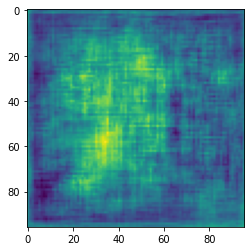

In [ ]:
plt.imshow(xhat[0,0].cpu().detach().numpy())

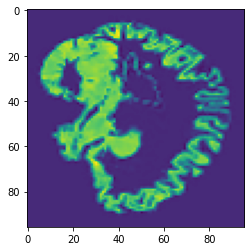

In [ ]:
plt.imshow(x_n[0,0].cpu().detach().numpy())

### Inference

In [ ]:
from models import Encoder, Decoder

In [ ]:
E = Encoder(exp["method"], fin=exp["input_shape"][0], zdim=exp["zdim"], dense=exp["dense"], n_blocks=exp["n_blocks"],
                         spatial_dim=exp["input_shape"][1]//2**exp["n_blocks"])
Dec = Decoder(fin=exp["zdim"], nf0=E.backbone.nfeats//2, n_channels=exp["input_shape"][0],
                           dense=exp["dense"], n_blocks=exp["n_blocks"], spatial_dim=exp["input_shape"][1]//2**exp["n_blocks"])

In [ ]:
E.load_state_dict(torch.load('/content/encoder_weights.pth', map_location=torch.device('cpu')))
Dec.load_state_dict(torch.load('/content/decoder_weights.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
x_n = torch.tensor(x_n).float()

In [ ]:
from scipy import ndimage

In [ ]:
def inference_on_scan(X):

        # Init variables
        (c, h, w) = X.shape  # maps dimensions
        Mhat = np.zeros(X.shape)   # Predicted segmentation maps
        Xhat = np.zeros(X.shape)   # Reconstructed images

      
        # Take image
        x = X[:]

        # Prepare brain eroded mask
        x_mask = 1 - (x == 0).astype(np.int)
        #x_mask = ndimage.binary_closing(x_mask, structure=np.ones((1, 3, 3))).astype(x_mask.dtype)
        x_mask = ndimage.binary_erosion(x_mask, structure=np.ones((1, 3, 3))).astype(x_mask.dtype)

        # Network forward
        z, z_mu, z_logvar, f = E(torch.tensor(x).float().unsqueeze(0))
        xhat = np.squeeze(torch.sigmoid(Dec(z)[0]).detach().numpy())
        
        # Compute grad-cams
        activations = f[exp["level_cams"]]
        gradients = torch.autograd.grad(torch.sum(z_mu), activations, grad_outputs=None, retain_graph=True, create_graph=True,
                                    only_inputs=True, allow_unused=True)[0]
        if exp["avg_grads"]:
            gradients = torch.mean(gradients, dim=[2, 3])
            gradients = gradients.unsqueeze(-1).unsqueeze(-1)
        gcam = torch.sum(gradients * activations, 1)

        # Restore original shape
        mhat = torch.nn.functional.interpolate(gcam.unsqueeze(0), size=(h, w), mode='bilinear',
                                                align_corners=True).squeeze().detach().cpu().numpy()

        # max-normalization
        if len(mhat[x_mask[0, :, :] == 1]) > 0:
            mhat = mhat - np.min(mhat[x_mask[0, :, :] == 1])
        mhat = mhat / np.max(mhat)

        # Keep only brain region
        mhat[x_mask[0, :, :] == 0] = 0

        return mhat, xhat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


0


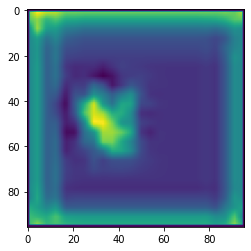

1


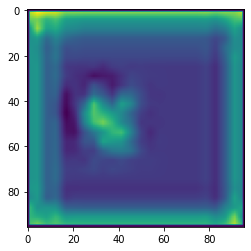

2


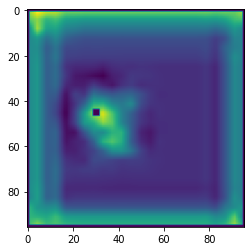

3


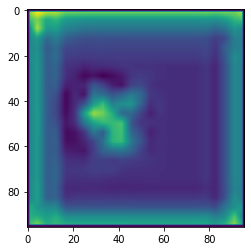

4


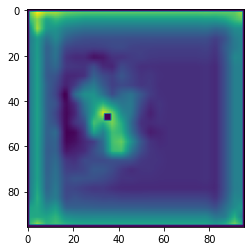

5


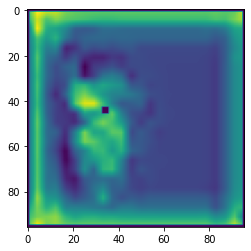

6


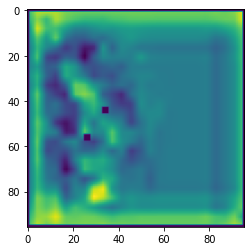

7


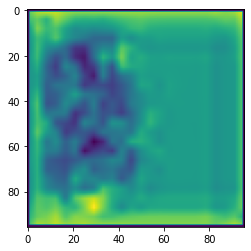

8


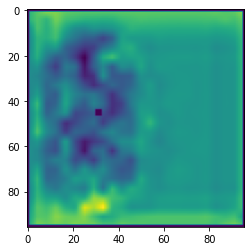

9


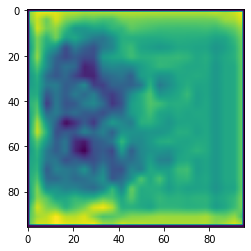

10


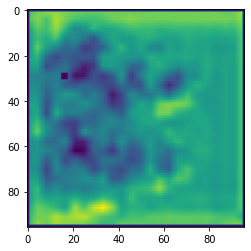

11


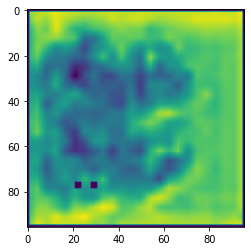

12


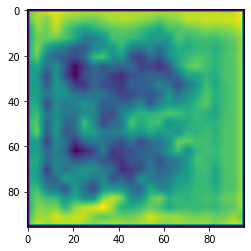

13


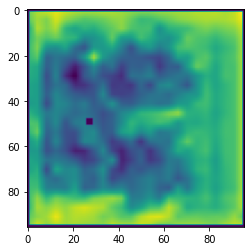

14


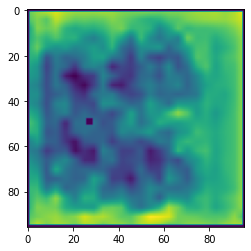

15


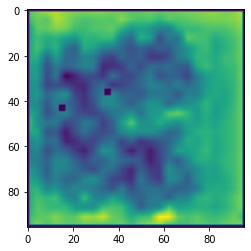

16


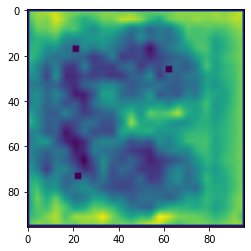

17


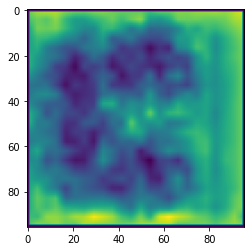

18


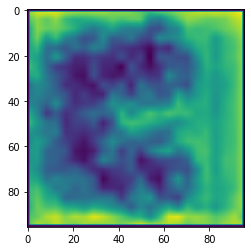

19


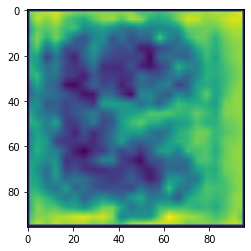

20


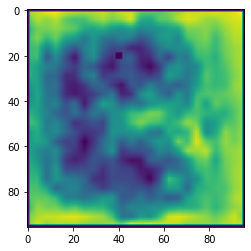

21


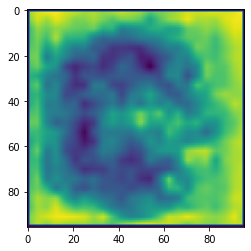

22


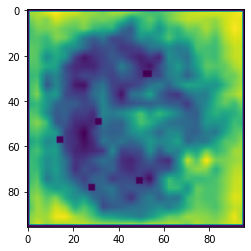

23


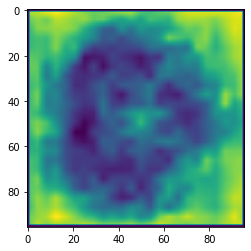

24


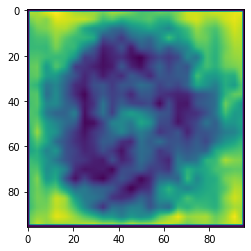

25


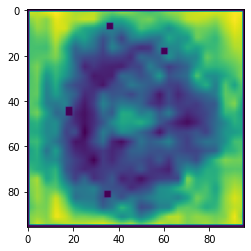

26


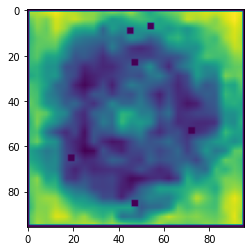

27


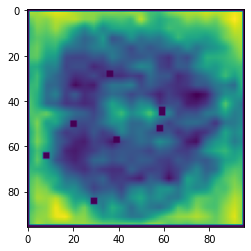

28


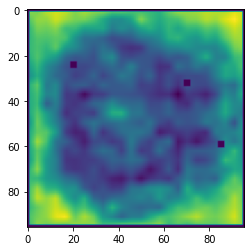

29


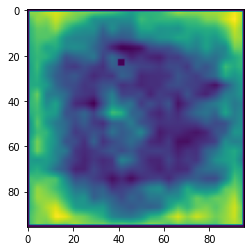

30


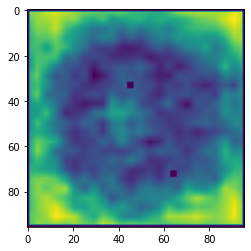

31


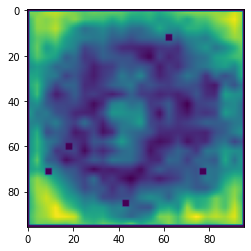

In [ ]:
for i in range(32):
    mhat, xhat = inference_on_scan(x_n[i])
    if np.max(mhat) > 0:
      print(i)
      plt.imshow(mhat);plt.show()

In [ ]:
mhat, xhat = inference_on_scan(x_n[23])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


In [ ]:
mhat.shape, np.max(mhat)

((96, 96), 0.96555287)

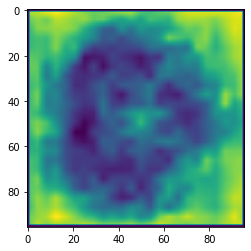

In [ ]:
plt.imshow(mhat);plt.show()

In [ ]:
import cv2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


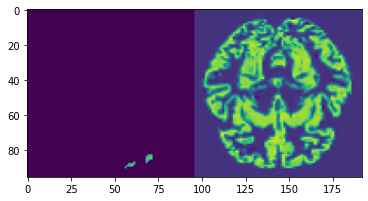

In [ ]:
fig, ax = plt.subplots()
ims = []
for i in range(32):
    test_im, _ = inference_on_scan(x_n[i])

    t_im = nii_data[:, :, i, 8].T.copy()
    
    min_n = sorted(np.nan_to_num(np.unique(t_im)))[0]
    t_im = np.nan_to_num(t_im, min_n)
    t_im = t_im - np.min(t_im)
    t_im = (t_im*(255/np.max(t_im))).astype(np.uint8)
    
    orig = cv2.resize(t_im, (96, 96))

    test_im[orig<100] = 0
    test_im[test_im<0.6] = 0
  
    im = ax.imshow(np.hstack([test_im*255, orig]), animated=True, interpolation=None)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim

In [ ]:
np.max(nii_data[:, :, i, 8])

1.301450490951538